# info
This script reads the Seahorse experiment data.
It performs quantitative analysis and builds figures for publication


In [1]:
#
# QA
#

# ECAR data: when glucose, oligomycin and 2-DG was added?

In [2]:
import pandas

import scipy, scipy.stats

import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 'font.family':'FreeSans', 'xtick.labelsize':20, 'ytick.labelsize':20, 'figure.figsize':(12, 8)})

# 0. user-defined variables

In [3]:
input_file = '/home/adrian/gd15/hi/research/huvec/results/seahorse/v001/HUVEC - 01.xlsx'

# 1. read data

## 1.1. OCR

In [4]:
df = pandas.read_excel(input_file, sheet_name='Normalized Rate (Columns)', skiprows=8, nrows=15)
df.rename(columns={'Unnamed: 0':'time'}, inplace=True)

print('before trimming')
print(df.columns)

columns2drop = [element for element in df.columns.to_list() if 'Unnamed' in element]
print(columns2drop)
df.drop(labels=columns2drop, axis='columns', inplace=True)

print()
print('after trimming')
print(df.columns)

ocr=df

before trimming
Index(['time', 'B03', 'C03', 'D03', 'E03', 'F03', 'G03', 'Unnamed: 7', 'C04',
       'C05', 'C06', 'C07', 'C08', 'C09', 'C10', 'C11', 'Unnamed: 16', 'B04',
       'B05', 'B06', 'B07', 'B08', 'B09', 'B10', 'B11', 'Unnamed: 25', 'E04',
       'E05', 'E06', 'E07', 'E08', 'E09', 'E10', 'E11', 'Unnamed: 34', 'D04',
       'D05', 'D06', 'D07', 'D08', 'D09', 'D10', 'D11', 'Unnamed: 43', 'G04',
       'G05', 'G06', 'G07', 'G08', 'G09', 'G10', 'G11', 'Unnamed: 52', 'F04',
       'F05', 'F06', 'F07', 'F08', 'F09', 'F10', 'F11', 'Unnamed: 61', 'B02',
       'C02', 'D02', 'E02', 'F02', 'G02'],
      dtype='object')
['Unnamed: 7', 'Unnamed: 16', 'Unnamed: 25', 'Unnamed: 34', 'Unnamed: 43', 'Unnamed: 52', 'Unnamed: 61']

after trimming
Index(['time', 'B03', 'C03', 'D03', 'E03', 'F03', 'G03', 'C04', 'C05', 'C06',
       'C07', 'C08', 'C09', 'C10', 'C11', 'B04', 'B05', 'B06', 'B07', 'B08',
       'B09', 'B10', 'B11', 'E04', 'E05', 'E06', 'E07', 'E08', 'E09', 'E10',
       'E11', 'D04',

In [5]:
ocr

,time,B03,C03,D03,E03,F03,G03,C04,C05,C06,...,F08,F09,F10,F11,B02,C02,D02,E02,F02,G02
0,1.311822,118.224710,103.786360,102.395492,545.595593,103.645696,52.556486,258.849568,231.874849,397.497737,...,89.235173,102.441019,231.310127,71.240242,106.041849,103.066599,93.746282,105.185561,102.302946,71.738424
1,7.775667,258.034057,101.026967,100.687131,529.304004,98.424437,49.321177,246.098802,219.280540,376.814917,...,83.795252,98.406006,226.488086,70.567140,98.556340,101.739053,89.803790,99.734027,92.918339,70.480344
2,14.233321,193.249495,99.057729,98.283094,520.213095,98.054813,48.190918,240.440208,214.888389,365.021912,...,81.326025,95.701448,221.479612,69.791751,97.314417,100.162452,89.062807,96.833130,90.689514,69.621394
3,20.693441,163.031212,99.446555,97.287709,517.808335,96.338131,46.865429,239.292099,211.549889,363.711004,...,80.251694,95.828183,218.300493,69.515024,95.777348,98.470615,88.540155,96.139320,89.277465,68.483761
4,27.150621,150.565371,98.366719,96.231017,508.681234,94.509597,44.800475,237.424164,208.591263,357.823327,...,79.065487,95.668252,217.696836,68.068904,93.810062,97.643545,86.846921,94.876652,88.641148,66.421013
5,33.607746,144.639339,95.713731,95.356329,501.577978,93.724419,43.970018,236.388006,205.470503,360.879323,...,78.834044,92.561844,211.505016,66.824352,93.072504,96.521718,86.767205,93.833655,87.095327,65.530157
6,40.178781,106.422204,51.503574,48.288397,264.675969,50.700033,30.820259,126.458958,112.757839,152.969380,...,39.472398,48.903272,274.517814,35.372747,49.354392,52.857110,49.747326,50.468874,43.796462,38.069167
7,46.639178,102.852217,52.277146,46.792949,255.539521,49.267702,29.401402,114.988902,107.965089,149.775818,...,37.901776,46.049030,222.515433,33.510279,49.139220,51.007794,48.319600,49.560142,41.716637,36.474934
8,53.102267,104.048155,51.197533,46.382091,249.709592,47.563985,27.220564,111.316040,105.606132,140.658483,...,37.972750,45.985048,189.699311,33.662689,49.009608,50.661378,48.122699,48.957170,40.485689,35.597243
9,59.671314,227.688806,237.967299,230.361539,1111.560129,190.636339,51.156126,540.785040,447.319699,808.661609,...,196.898322,216.440490,488.853331,151.309681,207.483171,227.365678,171.205798,205.585339,201.736147,34.373530


## 1.2. ECAR

In [6]:
df = pandas.read_excel(input_file, sheet_name='Normalized Rate (Columns)', skiprows=28, nrows=15)
df.rename(columns={'Unnamed: 0':'time'}, inplace=True)

print('before trimming')
print(df.columns)

columns2drop = [element for element in df.columns.to_list() if 'Unnamed' in element]
print(columns2drop)
df.drop(labels=columns2drop, axis='columns', inplace=True)

print()
print('after trimming')
print(df.columns)

ecar=df

before trimming
Index(['time', 'B03', 'C03', 'D03', 'E03', 'F03', 'G03', 'Unnamed: 7', 'C04',
       'C05', 'C06', 'C07', 'C08', 'C09', 'C10', 'C11', 'Unnamed: 16', 'B04',
       'B05', 'B06', 'B07', 'B08', 'B09', 'B10', 'B11', 'Unnamed: 25', 'E04',
       'E05', 'E06', 'E07', 'E08', 'E09', 'E10', 'E11', 'Unnamed: 34', 'D04',
       'D05', 'D06', 'D07', 'D08', 'D09', 'D10', 'D11', 'Unnamed: 43', 'G04',
       'G05', 'G06', 'G07', 'G08', 'G09', 'G10', 'G11', 'Unnamed: 52', 'F04',
       'F05', 'F06', 'F07', 'F08', 'F09', 'F10', 'F11', 'Unnamed: 61', 'B02',
       'C02', 'D02', 'E02', 'F02', 'G02'],
      dtype='object')
['Unnamed: 7', 'Unnamed: 16', 'Unnamed: 25', 'Unnamed: 34', 'Unnamed: 43', 'Unnamed: 52', 'Unnamed: 61']

after trimming
Index(['time', 'B03', 'C03', 'D03', 'E03', 'F03', 'G03', 'C04', 'C05', 'C06',
       'C07', 'C08', 'C09', 'C10', 'C11', 'B04', 'B05', 'B06', 'B07', 'B08',
       'B09', 'B10', 'B11', 'E04', 'E05', 'E06', 'E07', 'E08', 'E09', 'E10',
       'E11', 'D04',

In [7]:
ecar

,time,B03,C03,D03,E03,F03,G03,C04,C05,C06,...,F08,F09,F10,F11,B02,C02,D02,E02,F02,G02
0,1.311822,8.407650,6.550789,7.312128,41.521886,8.091077,4.013540,19.146398,13.175619,31.689542,...,9.566771,5.347914,12.052368,4.730697,6.931359,6.648399,7.504785,6.938617,5.522570,4.632651
1,7.775667,-0.264131,4.904418,7.179003,32.143923,7.444085,2.123587,12.418820,10.306310,23.939776,...,3.905701,3.833571,10.412226,2.709200,4.787936,3.194346,5.386889,5.762994,4.394033,3.577903
2,14.233321,3.774156,3.739499,5.109435,26.875110,5.874951,1.254280,12.578813,8.014592,21.363095,...,2.837738,3.001844,7.834734,2.267564,4.648508,3.118768,4.584218,5.174790,4.216804,3.283878
3,20.693441,4.409699,3.925573,5.149942,25.777219,5.552855,1.808173,12.349781,9.150861,20.874910,...,2.807116,3.399161,8.209417,1.880040,3.930347,2.870400,3.848486,4.514199,3.896197,2.972457
4,27.150621,4.671864,3.983525,4.664416,24.748340,5.158654,1.302240,12.171860,8.086874,19.412343,...,3.347142,2.898741,8.248772,1.905995,4.157470,3.100286,3.844490,4.399784,3.873631,2.948154
5,33.607746,4.882176,3.662231,4.851892,25.518304,4.944978,1.099326,12.184781,7.417192,17.024780,...,2.959837,3.248637,7.467483,1.837192,3.188379,2.490145,3.474555,4.129750,3.563046,2.674442
6,40.178781,4.954038,3.614188,4.347176,24.204810,4.226439,0.452539,15.197238,6.417041,16.044243,...,2.679426,2.289877,4.833579,1.989743,3.911269,2.799716,3.881380,3.918684,3.655992,2.374552
7,46.639178,3.572150,3.325960,4.125047,18.101669,4.517288,1.544476,13.319496,6.680230,13.366256,...,2.842062,1.809898,4.637234,1.742564,3.865643,2.567432,2.761180,3.107602,2.746757,2.112116
8,53.102267,3.134220,2.761857,3.410725,18.674054,3.293243,0.689704,10.846937,6.636985,10.739891,...,2.584877,1.427094,3.699437,1.188834,2.750348,2.019780,2.520486,2.963702,2.540712,1.713172
9,59.671314,14.517533,14.673493,14.828220,74.322409,12.451721,1.595933,35.591293,27.086100,52.552030,...,11.825688,11.035823,26.091098,7.845292,12.873629,12.892815,11.008922,13.719362,12.211434,1.526869


In [8]:
timepoints = ocr['time']
print(timepoints)
timepoints = ecar['time']
print(timepoints)

0      1.311822
1      7.775667
2     14.233321
3     20.693441
4     27.150621
5     33.607746
6     40.178781
7     46.639178
8     53.102267
9     59.671314
10    66.136260
11    72.599127
12    79.168761
13    85.633262
14    92.101479
Name: time, dtype: float64
0      1.311822
1      7.775667
2     14.233321
3     20.693441
4     27.150621
5     33.607746
6     40.178781
7     46.639178
8     53.102267
9     59.671314
10    66.136260
11    72.599127
12    79.168761
13    85.633262
14    92.101479
Name: time, dtype: float64


In [9]:
del df

# 2. Oxygen consumption rate (OCR) 

# 2.1. define raw and representative wells

In [10]:
control_wells = ['B02', 'C02', 'D02', 'E02', 'F02', 'G02']
samples_4h_half = ['D04', 'D05', 'D06', 'D07', 'D08', 'D09', 'D10', 'D11']
samples_4h_five = ['E04', 'E05', 'E06', 'E07', 'E08', 'E09', 'E10', 'E11']

control_wells_representative = ['B02', 'C02', 'D02', 'E02', 'F02']
samples_4h_half_representative = ['D04', 'D05', 'D06', 'D07', 'D08', 'D09', 'D10']
samples_4h_five_representative = ['E04', 'E05', 'E06', 'E07', 'E09', 'E10', 'E11']

### 2.1.1. control

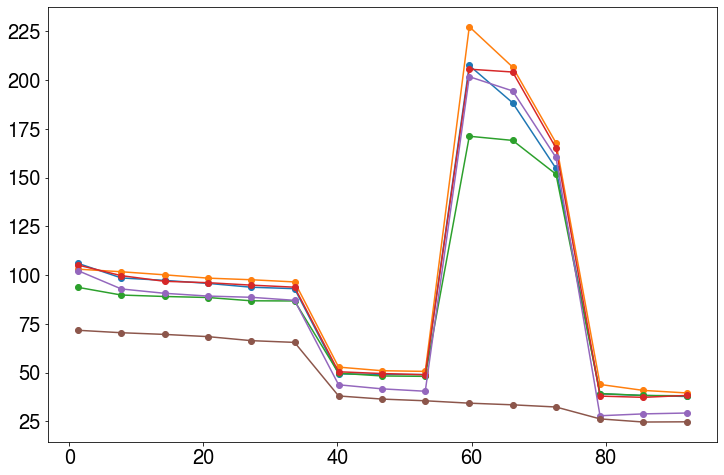

In [11]:
matplotlib.pyplot.plot(timepoints, ocr[control_wells], 'o-')
matplotlib.pyplot.show()

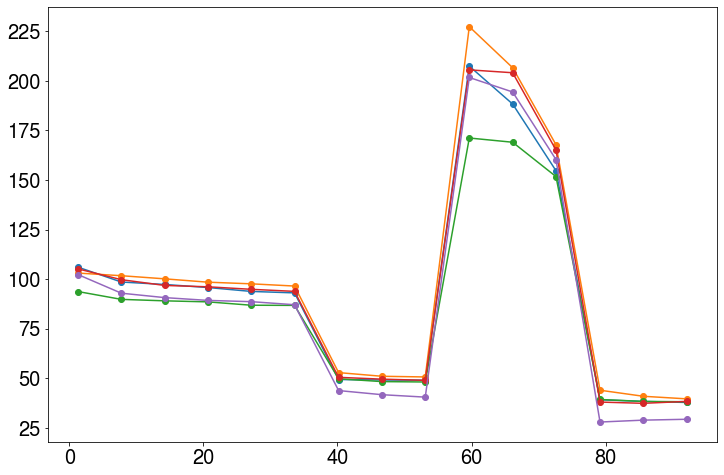

In [12]:
matplotlib.pyplot.plot(timepoints, ocr[control_wells_representative], 'o-')
matplotlib.pyplot.show()

In [49]:
relative_mu = ocr[control_wells_representative].mean()/ocr[control_wells_representative].mean().mean()
print(relative_mu)
normalized_black = ocr[control_wells_representative]/relative_mu

B02    1.011665
C02    1.069990
D02    0.932691
E02    1.030693
F02    0.954961
dtype: float64


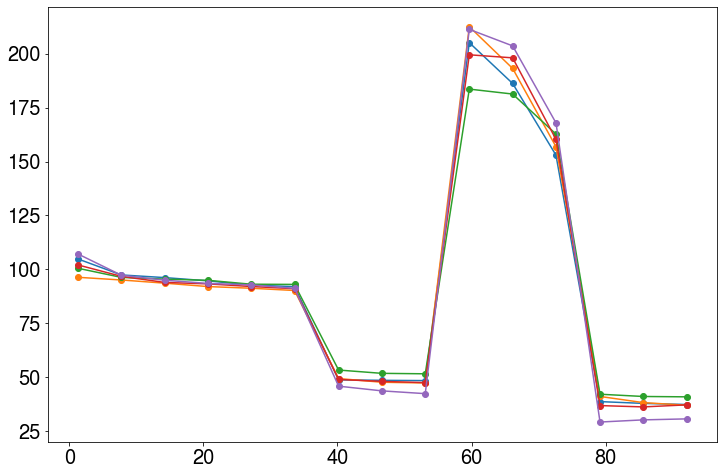

In [51]:
matplotlib.pyplot.plot(timepoints, normalized, 'o-')
matplotlib.pyplot.show()

### 2.1.2. samples 4 h 0.5 uM

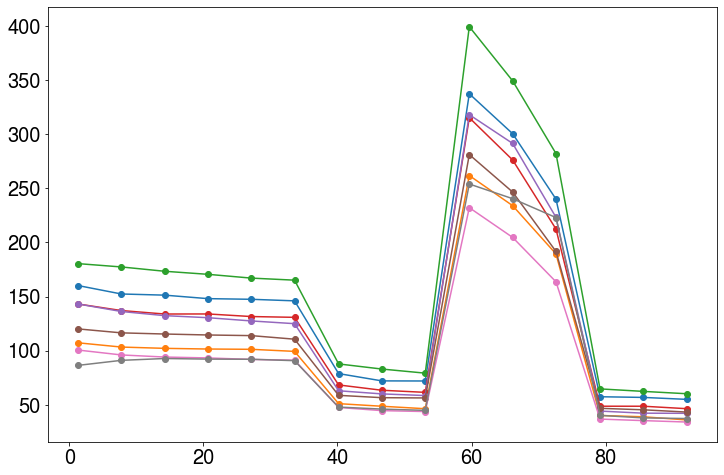

In [13]:
matplotlib.pyplot.plot(timepoints, ocr[samples_4h_half], 'o-')
matplotlib.pyplot.show()

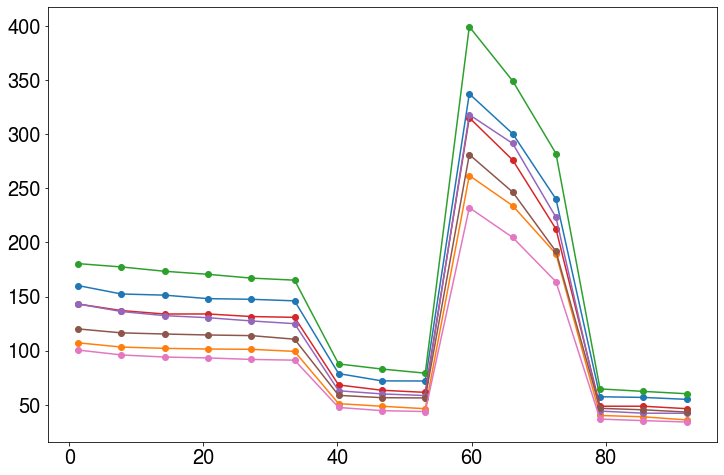

In [14]:
matplotlib.pyplot.plot(timepoints, ocr[samples_4h_half_representative], 'o-')
matplotlib.pyplot.show()

In [15]:
ocr[samples_4h_half]

,D04,D05,D06,D07,D08,D09,D10,D11
0,160.200449,107.273546,180.471932,143.162704,143.162106,120.123675,100.579813,86.401740
1,152.403570,103.337345,177.394099,137.084756,136.211764,116.463848,96.045276,91.053937
2,151.328040,102.147884,173.404700,133.885478,132.382297,115.391338,94.116776,92.748334
3,148.093574,101.521949,170.579366,133.938235,130.482225,114.500117,93.281190,92.196653
4,147.495298,101.258096,167.082592,131.549812,127.489425,113.911445,91.902129,92.065491
5,146.057111,99.343900,165.181339,130.816182,124.960614,110.614123,91.220873,90.746731
6,78.804351,51.020421,87.739366,68.321811,62.932372,58.704979,47.498934,47.855916
7,72.067428,48.617911,83.007654,63.399757,60.030223,56.545209,44.567320,45.996918
8,71.970549,46.338940,79.209264,61.462497,58.513019,56.287168,43.722513,44.820298
9,337.461469,261.892538,399.501835,315.346214,318.151088,281.253027,232.202062,254.063768


## 2.1.3. samples 4 h five

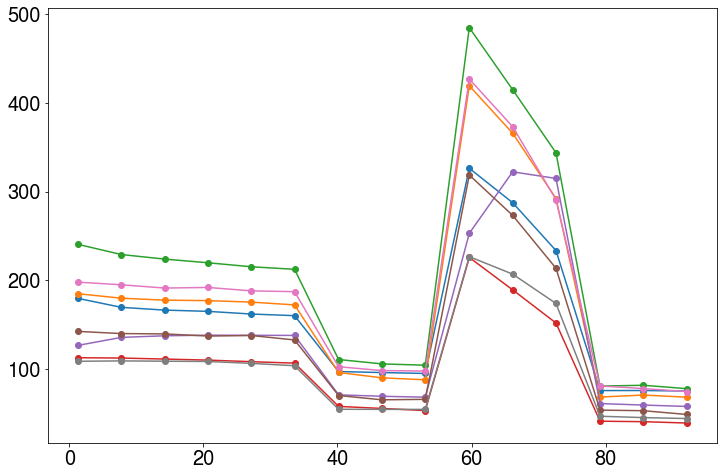

In [16]:
matplotlib.pyplot.plot(timepoints, ocr[samples_4h_five], 'o-')
matplotlib.pyplot.show()

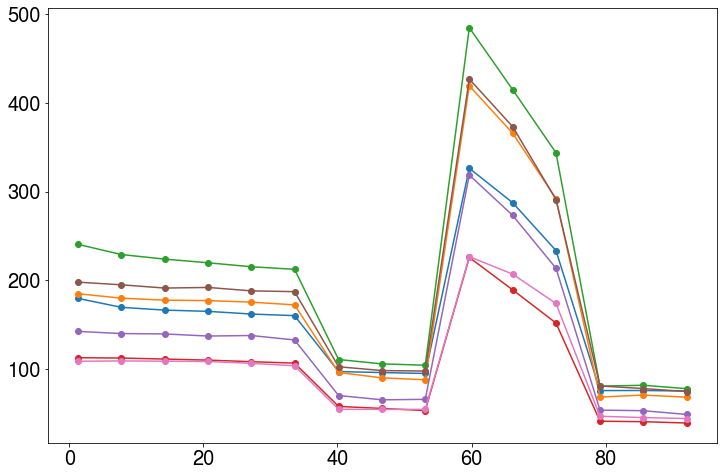

In [17]:
matplotlib.pyplot.plot(timepoints, ocr[samples_4h_five_representative], 'o-')
matplotlib.pyplot.show()

## 2.2. build figure

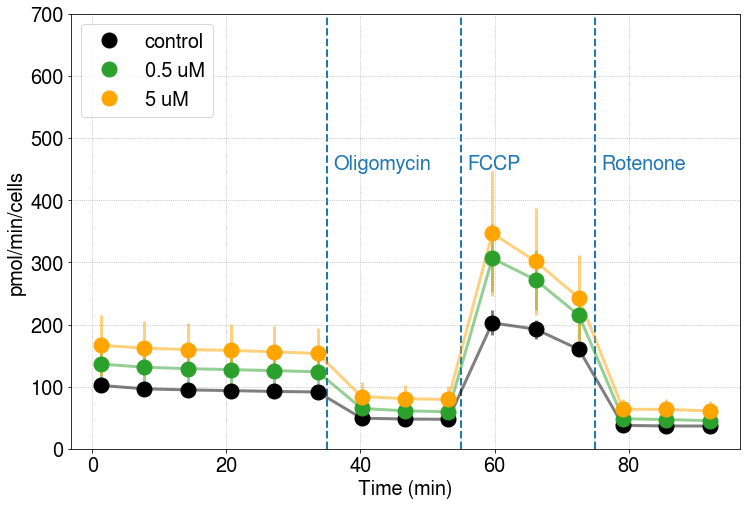

In [18]:
mean = ocr[control_wells_representative].mean(axis=1)
std = ocr[control_wells_representative].std(axis=1)
matplotlib.pyplot.errorbar(timepoints, mean, std, lw=3, color='black', alpha=1/2)
matplotlib.pyplot.plot(timepoints, mean, 'o', color='black', ms=15, label='control', zorder=999)

mean = ocr[samples_4h_half_representative].mean(axis=1)
std = ocr[samples_4h_half_representative].std(axis=1)
matplotlib.pyplot.errorbar(timepoints, mean, std, lw=3, color='#2CA02C', alpha=1/2)
matplotlib.pyplot.plot(timepoints, mean, 'o', color='#2CA02C', ms=15, label='0.5 uM', zorder=999)

mean = ocr[samples_4h_five_representative].mean(axis=1)
std = ocr[samples_4h_five_representative].std(axis=1)
matplotlib.pyplot.errorbar(timepoints, mean, std, lw=3, color='#FFA500', alpha=1/2)
matplotlib.pyplot.plot(timepoints, mean, 'o', color='#FFA500', ms=15, label='5 uM', zorder=999)

matplotlib.pyplot.grid(ls=':')

matplotlib.pyplot.axvline(x=35, ls='--', lw=2, color='tab:blue', zorder=1)
matplotlib.pyplot.axvline(x=55, ls='--', lw=2, color='tab:blue', zorder=1)
matplotlib.pyplot.axvline(x=75, ls='--', lw=2, color='tab:blue', zorder=1)

matplotlib.pyplot.text(36, 450, 'Oligomycin', color='tab:blue')
matplotlib.pyplot.text(56, 450, 'FCCP', color='tab:blue')
matplotlib.pyplot.text(76, 450, 'Rotenone', color='tab:blue')

matplotlib.pyplot.xlabel('Time (min)')
matplotlib.pyplot.ylabel('pmol/min/cells')
matplotlib.pyplot.legend(loc=2)
matplotlib.pyplot.ylim([0, 700])

matplotlib.pyplot.show()

#matplotlib.pyplot.savefig('seahorse.4h.svg')

# 2.3. statistical differences

In [19]:
# statistical tests
for i in range(len(timepoints)):
    timepoint = timepoints[i]
    x = ocr[control_wells_representative].iloc[i, :].values
    y = ocr[samples_4h_half_representative].iloc[i, :].values
    z = ocr[samples_4h_five_representative].iloc[i, :].values
    
    stata, pvaluea = scipy.stats.mannwhitneyu(x, y)
    statb, pvalueb = scipy.stats.mannwhitneyu(x, z)
    
    #print(i)
    print(timepoint)
    #print(x)
    #print(y)
    #print(z)
    if pvaluea < 0.05:
        print('half: significant', pvaluea)
    if pvalueb < 0.05:
        print('five: significant', pvalueb)
    
    print()
    

1.31182166
half: significant 0.030303030303030304
five: significant 0.0025252525252525255

7.77566669
half: significant 0.01767676767676768
five: significant 0.0025252525252525255

14.2333211116667
half: significant 0.01767676767676768
five: significant 0.0025252525252525255

20.6934414133333
half: significant 0.01767676767676768
five: significant 0.0025252525252525255

27.15062079
half: significant 0.01767676767676768
five: significant 0.0025252525252525255

33.6077456233333
half: significant 0.01767676767676768
five: significant 0.0025252525252525255

40.1787807716667
half: significant 0.04797979797979798
five: significant 0.0025252525252525255

46.63917821
five: significant 0.0025252525252525255

53.1022672866667
five: significant 0.0025252525252525255

59.6713138166667
half: significant 0.0025252525252525255
five: significant 0.010101010101010102

66.1362596516667
half: significant 0.005050505050505051
five: significant 0.01767676767676768

72.599126725
half: significant 0.01010101

In [20]:
# working with 24 hours data

In [21]:
samples_24h_half = ['B04', 'B05', 'B06', 'B07', 'B08', 'B09', 'B10', 'B11']
samples_24h_five = ['C04', 'C05', 'C06', 'C07', 'C08', 'C09', 'C10', 'C11']

samples_24h_half_representative = ['B04', 'B05', 'B06', 'B07', 'B08', 'B09', 'B10', 'B11']
samples_24h_five_representative = ['C04', 'C05', 'C06', 'C07', 'C08', 'C09', 'C10']

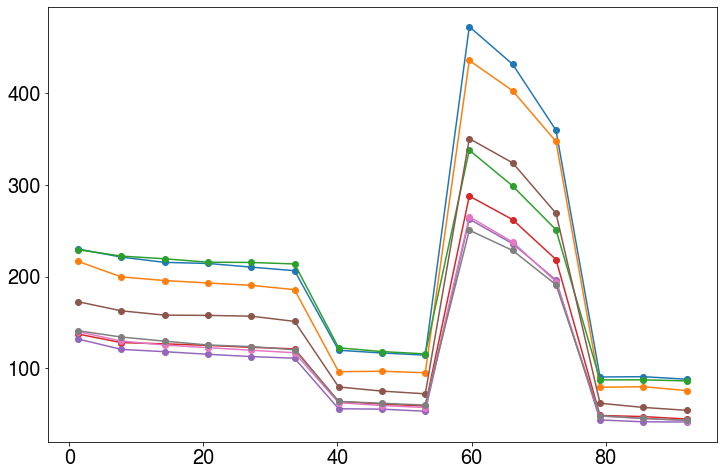

In [22]:
matplotlib.pyplot.plot(timepoints, ocr[samples_24h_half], 'o-')
matplotlib.pyplot.show()

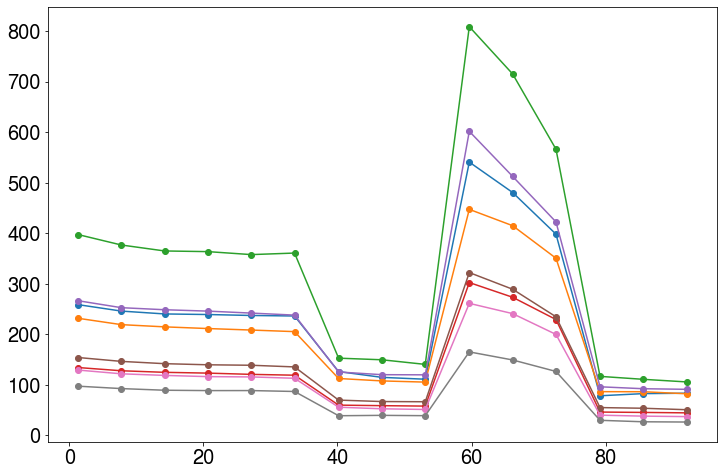

In [23]:
matplotlib.pyplot.plot(timepoints, ocr[samples_24h_five], 'o-')
matplotlib.pyplot.show()

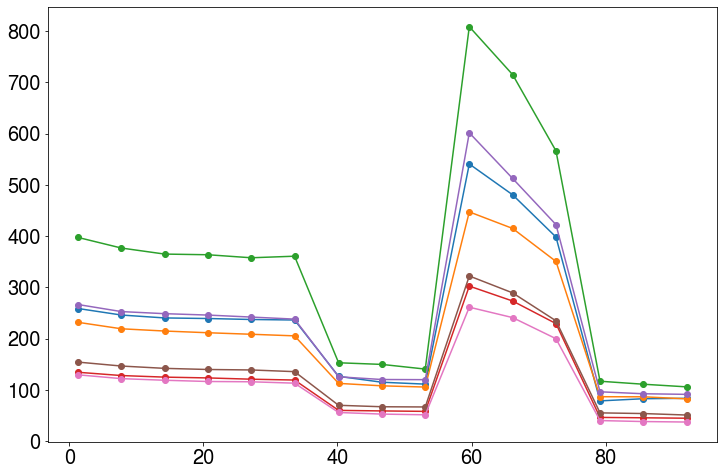

In [24]:
matplotlib.pyplot.plot(timepoints, ocr[samples_24h_five_representative], 'o-')
matplotlib.pyplot.show()

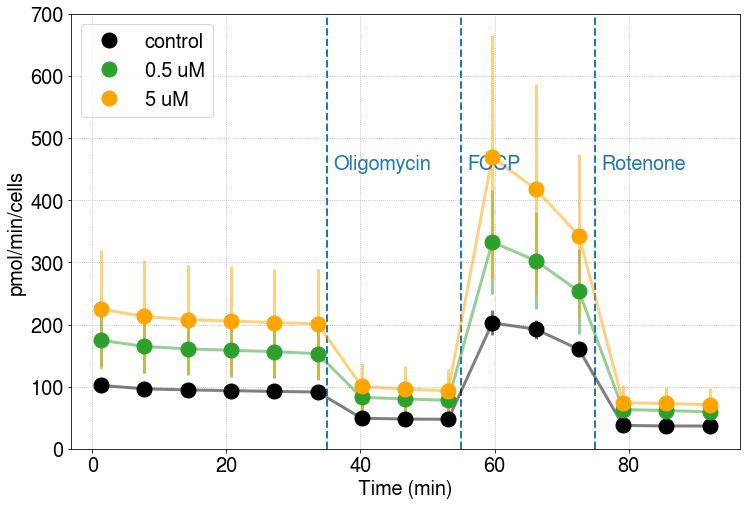

In [25]:
mean = ocr[control_wells_representative].mean(axis=1)
std = ocr[control_wells_representative].std(axis=1)
matplotlib.pyplot.errorbar(timepoints, mean, std, lw=3, color='black', alpha=1/2)
matplotlib.pyplot.plot(timepoints, mean, 'o', color='black', ms=15, label='control', zorder=999)

mean = ocr[samples_24h_half_representative].mean(axis=1)
std = ocr[samples_24h_half_representative].std(axis=1)
matplotlib.pyplot.errorbar(timepoints, mean, std, lw=3, color='#2CA02C', alpha=1/2)
matplotlib.pyplot.plot(timepoints, mean, 'o', color='#2CA02C', ms=15, label='0.5 uM', zorder=999)

mean = ocr[samples_24h_five_representative].mean(axis=1)
std = ocr[samples_24h_five_representative].std(axis=1)
matplotlib.pyplot.errorbar(timepoints, mean, std, lw=3, color='#FFA500', alpha=1/2)
matplotlib.pyplot.plot(timepoints, mean, 'o', color='#FFA500', ms=15, label='5 uM', zorder=999)

matplotlib.pyplot.grid(ls=':')

matplotlib.pyplot.axvline(x=35, ls='--', lw=2, color='tab:blue', zorder=1)
matplotlib.pyplot.axvline(x=55, ls='--', lw=2, color='tab:blue', zorder=1)
matplotlib.pyplot.axvline(x=75, ls='--', lw=2, color='tab:blue', zorder=1)

matplotlib.pyplot.text(36, 450, 'Oligomycin', color='tab:blue')
matplotlib.pyplot.text(56, 450, 'FCCP', color='tab:blue')
matplotlib.pyplot.text(76, 450, 'Rotenone', color='tab:blue')

matplotlib.pyplot.xlabel('Time (min)')
matplotlib.pyplot.ylabel('pmol/min/cells')
matplotlib.pyplot.legend(loc=2)
matplotlib.pyplot.ylim([0, 700])

matplotlib.pyplot.show()

#matplotlib.pyplot.savefig('seahorse.4h.svg')

In [26]:
# consider running the boxplots

# ECAR

In [27]:
ecar

,time,B03,C03,D03,E03,F03,G03,C04,C05,C06,...,F08,F09,F10,F11,B02,C02,D02,E02,F02,G02
0,1.311822,8.407650,6.550789,7.312128,41.521886,8.091077,4.013540,19.146398,13.175619,31.689542,...,9.566771,5.347914,12.052368,4.730697,6.931359,6.648399,7.504785,6.938617,5.522570,4.632651
1,7.775667,-0.264131,4.904418,7.179003,32.143923,7.444085,2.123587,12.418820,10.306310,23.939776,...,3.905701,3.833571,10.412226,2.709200,4.787936,3.194346,5.386889,5.762994,4.394033,3.577903
2,14.233321,3.774156,3.739499,5.109435,26.875110,5.874951,1.254280,12.578813,8.014592,21.363095,...,2.837738,3.001844,7.834734,2.267564,4.648508,3.118768,4.584218,5.174790,4.216804,3.283878
3,20.693441,4.409699,3.925573,5.149942,25.777219,5.552855,1.808173,12.349781,9.150861,20.874910,...,2.807116,3.399161,8.209417,1.880040,3.930347,2.870400,3.848486,4.514199,3.896197,2.972457
4,27.150621,4.671864,3.983525,4.664416,24.748340,5.158654,1.302240,12.171860,8.086874,19.412343,...,3.347142,2.898741,8.248772,1.905995,4.157470,3.100286,3.844490,4.399784,3.873631,2.948154
5,33.607746,4.882176,3.662231,4.851892,25.518304,4.944978,1.099326,12.184781,7.417192,17.024780,...,2.959837,3.248637,7.467483,1.837192,3.188379,2.490145,3.474555,4.129750,3.563046,2.674442
6,40.178781,4.954038,3.614188,4.347176,24.204810,4.226439,0.452539,15.197238,6.417041,16.044243,...,2.679426,2.289877,4.833579,1.989743,3.911269,2.799716,3.881380,3.918684,3.655992,2.374552
7,46.639178,3.572150,3.325960,4.125047,18.101669,4.517288,1.544476,13.319496,6.680230,13.366256,...,2.842062,1.809898,4.637234,1.742564,3.865643,2.567432,2.761180,3.107602,2.746757,2.112116
8,53.102267,3.134220,2.761857,3.410725,18.674054,3.293243,0.689704,10.846937,6.636985,10.739891,...,2.584877,1.427094,3.699437,1.188834,2.750348,2.019780,2.520486,2.963702,2.540712,1.713172
9,59.671314,14.517533,14.673493,14.828220,74.322409,12.451721,1.595933,35.591293,27.086100,52.552030,...,11.825688,11.035823,26.091098,7.845292,12.873629,12.892815,11.008922,13.719362,12.211434,1.526869


In [28]:
control_wells = ['B02', 'C02', 'D02', 'E02', 'F02', 'G02']
samples_4h_half = ['D04', 'D05', 'D06', 'D07', 'D08', 'D09', 'D10', 'D11']
samples_4h_five = ['E04', 'E05', 'E06', 'E07', 'E08', 'E09', 'E10', 'E11']

control_wells_representative = ['B02', 'C02', 'D02', 'E02', 'F02']
samples_4h_half_representative = samples_4h_half
samples_4h_five_representative = ['E04', 'E05', 'E06', 'E09', 'E10'] # removed E07, E08 and E11

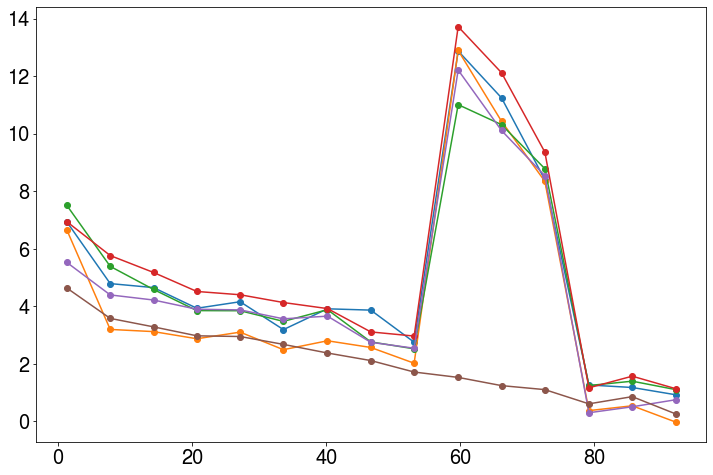

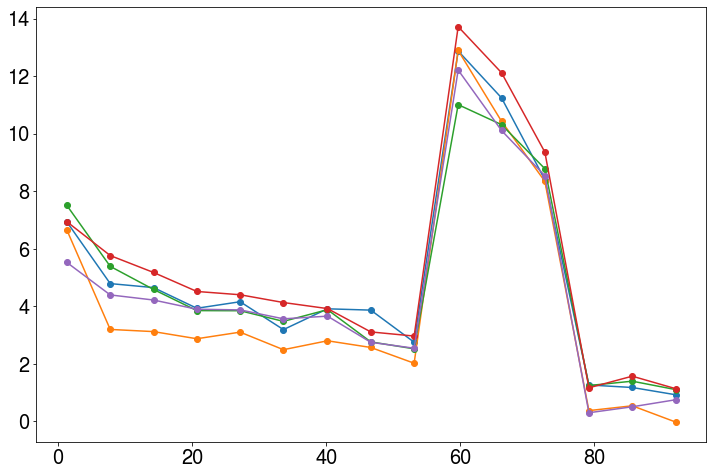

In [29]:
matplotlib.pyplot.plot(timepoints, ecar[control_wells], 'o-')
matplotlib.pyplot.show()

matplotlib.pyplot.plot(timepoints, ecar[control_wells_representative], 'o-')
matplotlib.pyplot.show()

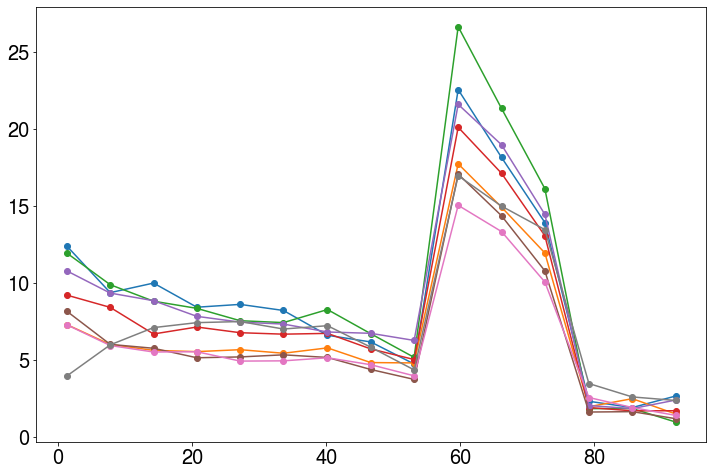

In [30]:
matplotlib.pyplot.plot(timepoints, ecar[samples_4h_half], 'o-')
matplotlib.pyplot.show()

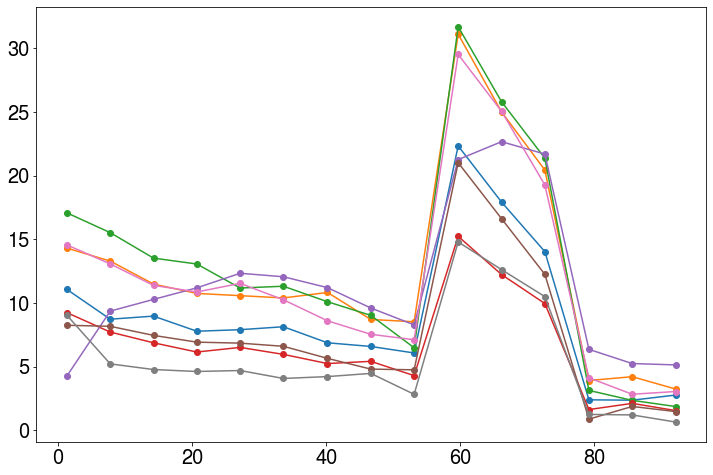

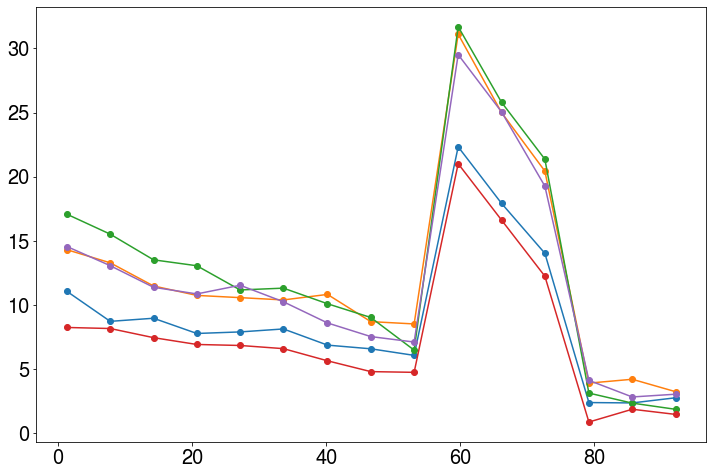

In [31]:
matplotlib.pyplot.plot(timepoints, ecar[samples_4h_five], 'o-')
matplotlib.pyplot.show()

matplotlib.pyplot.plot(timepoints, ecar[samples_4h_five_representative], 'o-')
matplotlib.pyplot.show()

In [32]:
ecar[samples_4h_five]

,E04,E05,E06,E07,E08,E09,E10,E11
0,11.062994,14.308438,17.076876,9.238055,4.257711,8.245561,14.558516,9.031634
1,8.722470,13.287433,15.520689,7.712869,9.356325,8.163605,13.063829,5.213804
2,8.964720,11.482589,13.520176,6.868844,10.277212,7.451536,11.379191,4.768990
3,7.777726,10.746019,13.057896,6.143627,11.184729,6.920159,10.861102,4.616212
4,7.898389,10.571088,11.170550,6.506876,12.328744,6.841834,11.537239,4.691562
5,8.130270,10.392857,11.312143,5.959392,12.056691,6.594088,10.248372,4.066961
6,6.869017,10.823131,10.094640,5.238067,11.201627,5.646310,8.598724,4.214844
7,6.582553,8.701261,9.023585,5.412994,9.600990,4.803254,7.535259,4.465441
8,6.069868,8.520687,6.479626,4.290608,8.277906,4.747049,7.108836,2.822173
9,22.331655,31.111596,31.697709,15.230694,21.259600,21.014457,29.517782,14.790764


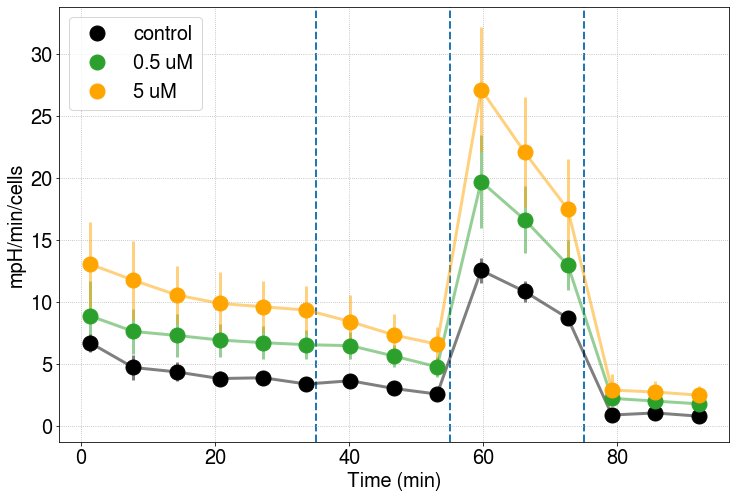

In [33]:
mean = ecar[control_wells_representative].mean(axis=1)
std = ecar[control_wells_representative].std(axis=1)
matplotlib.pyplot.errorbar(timepoints, mean, std, lw=3, color='black', alpha=1/2)
matplotlib.pyplot.plot(timepoints, mean, 'o', color='black', ms=15, label='control', zorder=999)

mean = ecar[samples_4h_half_representative].mean(axis=1)
std = ecar[samples_4h_half_representative].std(axis=1)
matplotlib.pyplot.errorbar(timepoints, mean, std, lw=3, color='#2CA02C', alpha=1/2)
matplotlib.pyplot.plot(timepoints, mean, 'o', color='#2CA02C', ms=15, label='0.5 uM', zorder=999)

mean = ecar[samples_4h_five_representative].mean(axis=1)
std = ecar[samples_4h_five_representative].std(axis=1)
matplotlib.pyplot.errorbar(timepoints, mean, std, lw=3, color='#FFA500', alpha=1/2)
matplotlib.pyplot.plot(timepoints, mean, 'o', color='#FFA500', ms=15, label='5 uM', zorder=999)

matplotlib.pyplot.grid(ls=':')

matplotlib.pyplot.axvline(x=35, ls='--', lw=2, color='tab:blue', zorder=1)
matplotlib.pyplot.axvline(x=55, ls='--', lw=2, color='tab:blue', zorder=1)
matplotlib.pyplot.axvline(x=75, ls='--', lw=2, color='tab:blue', zorder=1)

#matplotlib.pyplot.text(36, 450, 'Oligomycin', color='tab:blue')
#matplotlib.pyplot.text(56, 450, 'FCCP', color='tab:blue')
#matplotlib.pyplot.text(76, 450, 'Rotenone', color='tab:blue')

matplotlib.pyplot.xlabel('Time (min)')
matplotlib.pyplot.ylabel('mpH/min/cells')
matplotlib.pyplot.legend(loc=2)
#matplotlib.pyplot.ylim([0, 700])

matplotlib.pyplot.show()



In [ ]:
samples_24h_half = ['B04', 'B05', 'B06', 'B07', 'B08', 'B09', 'B10', 'B11']
samples_24h_five = ['C04', 'C05', 'C06', 'C07', 'C08', 'C09', 'C10', 'C11']

#samples_24h_half_representative = ['B04', 'B05', 'B06', 'B07', 'B08', 'B09', 'B10', 'B11']
#samples_24h_five_representative = ['C04', 'C05', 'C06', 'C07', 'C08', 'C09', 'C10']

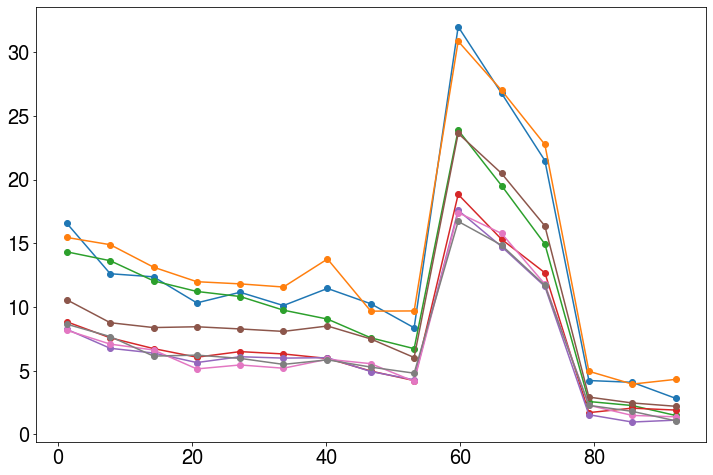

In [34]:
matplotlib.pyplot.plot(timepoints, ecar[samples_24h_half], 'o-')
matplotlib.pyplot.show()


In [ ]:
#consider a normalization of % deviation of teh average. one value for all trajectory

In [35]:
ecar[samples_24h_half]

,B04,B05,B06,B07,B08,B09,B10,B11
0,16.571353,15.464281,14.333623,8.841464,8.251120,10.567624,8.173476,8.652197
1,12.617064,14.897027,13.638593,7.584087,6.762251,8.770752,7.090237,7.683670
2,12.373229,13.132033,12.059113,6.739900,6.392029,8.390310,6.629689,6.149649
3,10.327356,11.991184,11.225307,6.062843,5.642232,8.453161,5.142733,6.226053
4,11.162240,11.820684,10.829031,6.501820,6.100231,8.281411,5.453882,5.969300
5,10.118517,11.573011,9.756828,6.317625,5.991714,8.088199,5.198086,5.499182
6,11.461017,13.774110,9.055982,5.965079,6.025477,8.511949,5.901917,5.855027
7,10.258659,9.678105,7.584101,4.974613,4.937057,7.497307,5.555066,5.286373
8,8.371255,9.695635,6.734212,4.226095,4.288629,6.038931,4.167330,4.808852
9,32.015485,30.876132,23.895150,18.845579,17.596512,23.636268,17.414052,16.725846


In [44]:
relative_mu = ecar[samples_24h_half].mean()/ecar[samples_24h_half].mean().mean()
relative_mu

B04    1.387082
B05    1.466768
B06    1.139286
B07    0.781830
B08    0.726509
B09    1.016549
B10    0.737024
B11    0.744952
dtype: float64

In [46]:
normalized = ecar[samples_24h_half]/relative_mu


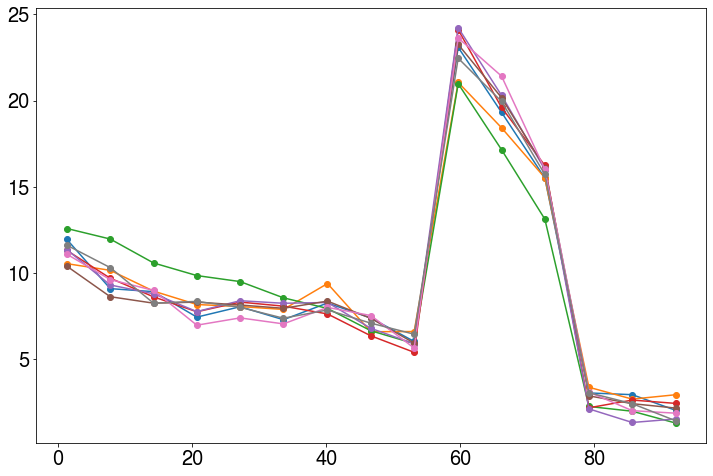

In [47]:
matplotlib.pyplot.plot(timepoints, normalized, 'o-')
matplotlib.pyplot.show()